# **Data Visualization**

## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


Download database file.


In [1]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
response = requests.get(url)

with open("data/m4_survey_data.sqlite", "wb") as file:
    file.write(response.content)

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("data/m4_survey_data.sqlite") # open a database connection

Import necessary libraries.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


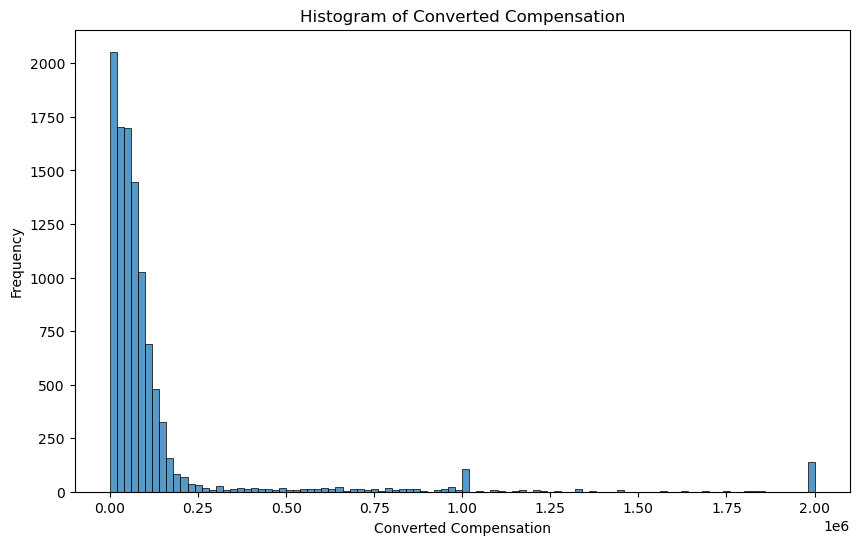

In [4]:
QUERY = """
SELECT ConvertedComp FROM master
"""
comp_df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.histplot(comp_df['ConvertedComp'], bins=100)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


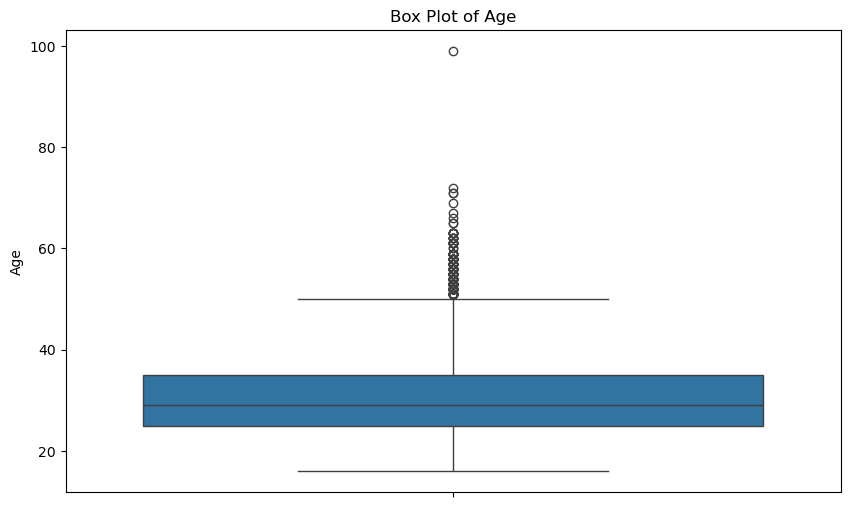

In [5]:
QUERY = """
SELECT Age FROM master
"""
age_df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.boxplot(y=age_df['Age'])
plt.title('Box Plot of Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


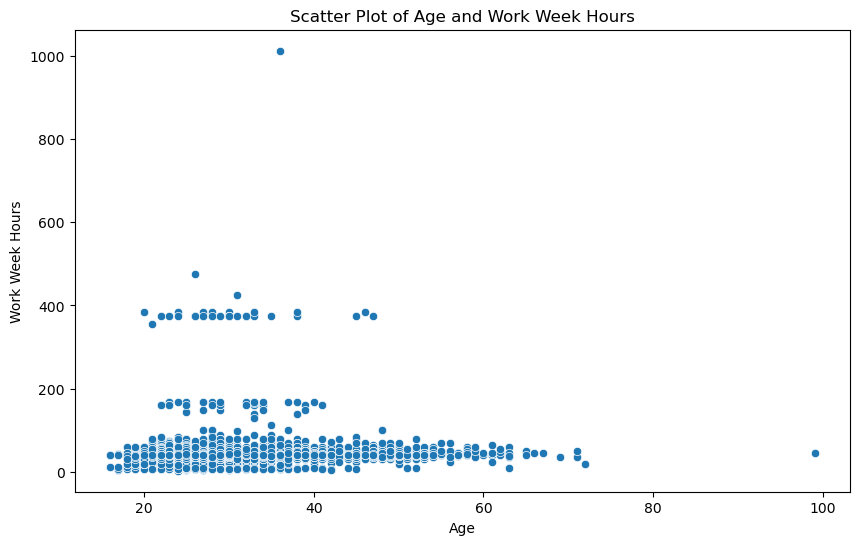

In [6]:
QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""
age_workweekhours_df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(data=age_workweekhours_df, x='Age',y='WorkWeekHrs')
plt.title('Scatter Plot of Age and Work Week Hours')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


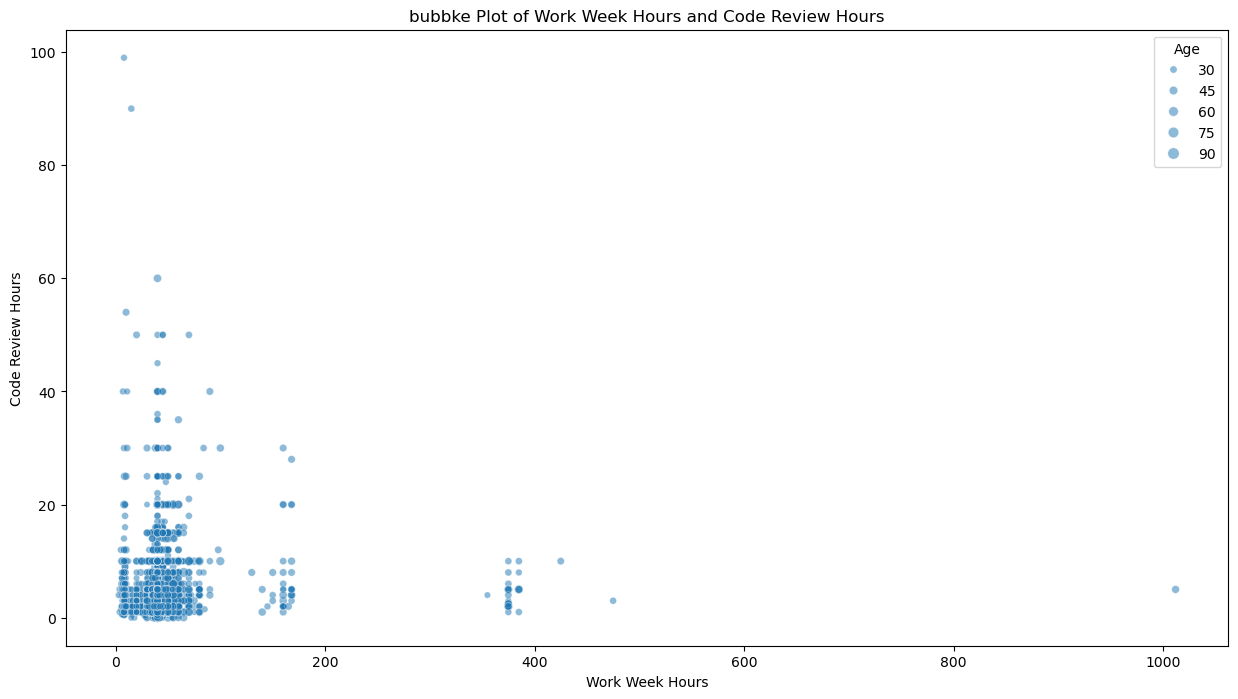

In [7]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
workweekhours_coderevhours_df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(15,8))
sns.scatterplot(data=workweekhours_coderevhours_df, x='WorkWeekHrs',y='CodeRevHrs', size='Age', alpha=0.5)
plt.title('bubbke Plot of Work Week Hours and Code Review Hours')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


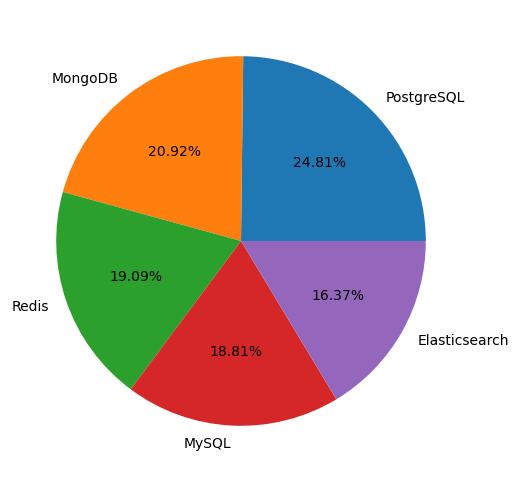

In [8]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC LIMIT 5
"""

db_desire_nxtyr_df = pd.read_sql_query(QUERY, conn)
db_desire_nxtyr_df

plt.figure(figsize=(10,6))
plt.pie(db_desire_nxtyr_df['Count'], labels=db_desire_nxtyr_df['DatabaseDesireNextYear'], autopct='%1.2f%%')

plt.show()

In [9]:
QUERY = """
SELECT LanguageDesireNextYear, Count(*) as Count FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
"""

lang_nxtyr_df = pd.read_sql_query(QUERY, conn)
lang_nxtyr_df

,LanguageDesireNextYear,Count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


In [10]:
QUERY = """
SELECT DatabaseWorkedWith, COUNT(*) as Count FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith='MySQL'
AND NOT EXISTS (
    SELECT 1
    FROM DatabaseWorkedWith other_dbs
    WHERE other_dbs.Respondent = DatabaseWorkedWith.Respondent
      AND other_dbs.DatabaseWorkedWith <> 'MySQL')
"""

lang_work_df = pd.read_sql_query(QUERY, conn)
lang_work_df

,DatabaseWorkedWith,Count
0,MySQL,474


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


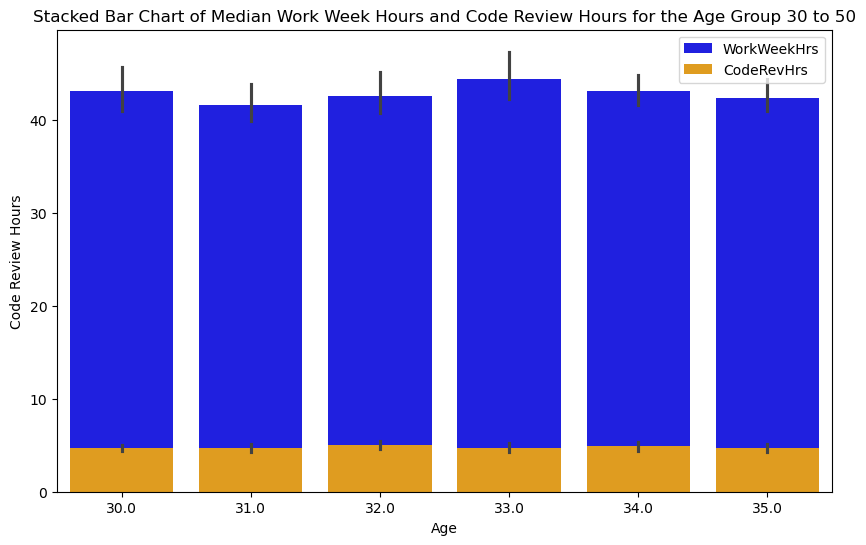

In [11]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
WHERE Age >=30 AND Age <=35
"""

age_group_df = pd.read_sql_query(QUERY, conn)
age_group_df

plt.figure(figsize=(10,6))
sns.barplot(data=age_group_df, x='Age', y='WorkWeekHrs', color='blue', label='WorkWeekHrs')
sns.barplot(data=age_group_df, x='Age', y='CodeRevHrs', color='orange', label='CodeRevHrs')

plt.title('Stacked Bar Chart of Median Work Week Hours and Code Review Hours for the Age Group 30 to 50')
plt.xlabel('Age')
plt.ylabel('Code Review Hours')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


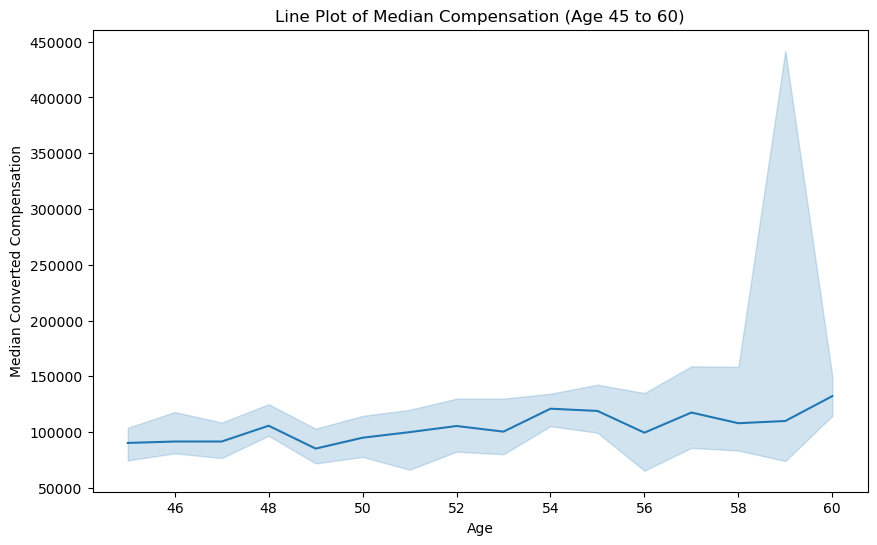

In [12]:
QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age >= 45 AND Age <=60
"""

convComp_age = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
sns.lineplot(data=convComp_age, x='Age', y='ConvertedComp', estimator='median')

plt.title('Line Plot of Median Compensation (Age 45 to 60)')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')

plt.show()

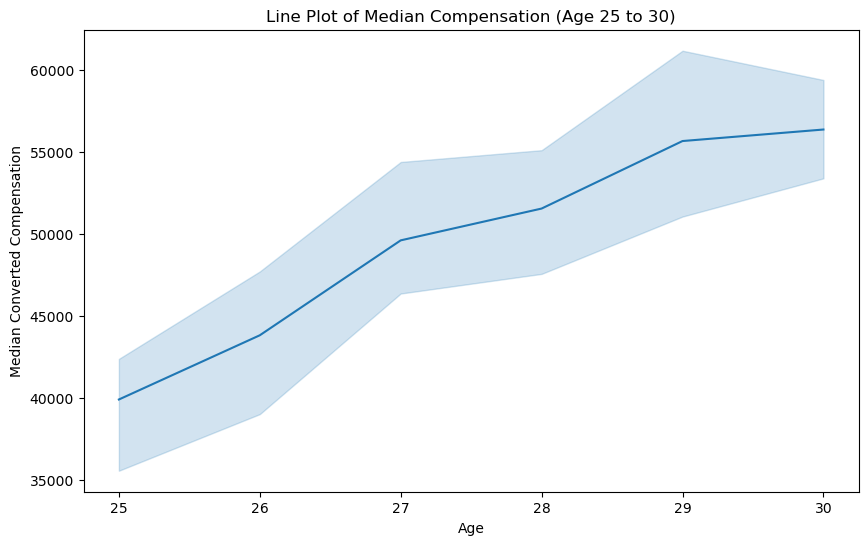

In [13]:
QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age >= 25 AND Age <=30
"""

convComp_age = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
sns.lineplot(data=convComp_age, x='Age', y='ConvertedComp', estimator='median')

plt.title('Line Plot of Median Compensation (Age 25 to 30)')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


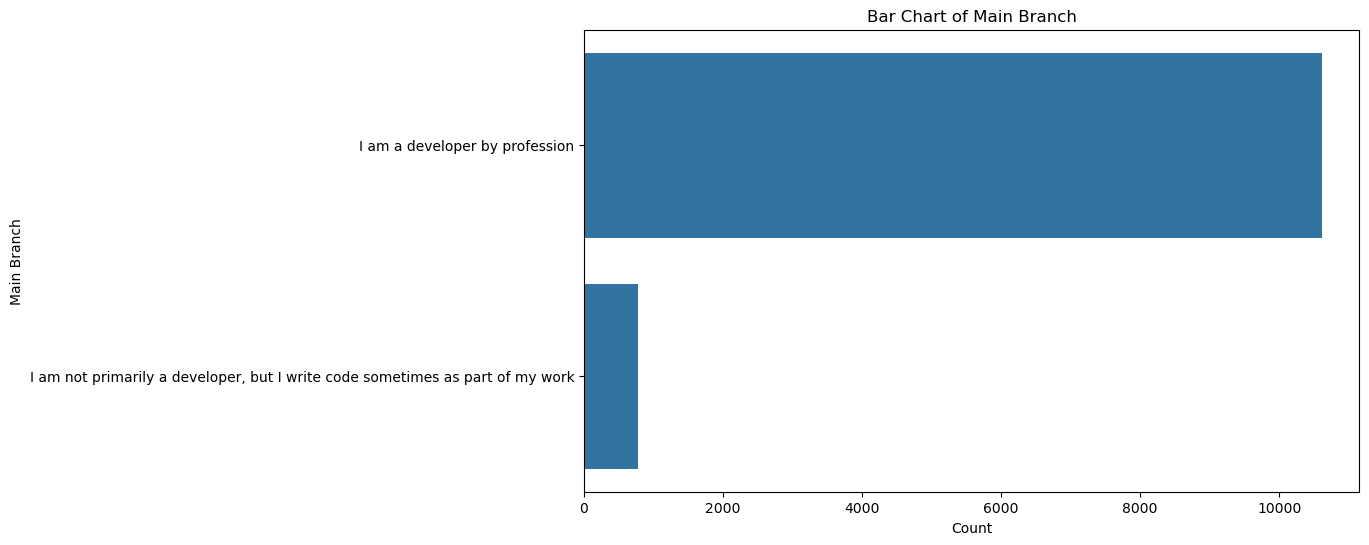

In [14]:
QUERY = """
SELECT MainBranch, COUNT(*) as Count FROM master
GROUP BY MainBranch
"""

main_branch = pd.read_sql_query(QUERY, conn)
main_branch

plt.figure(figsize=(10,6))
sns.barplot(data=main_branch, x='Count',y='MainBranch')
plt.title('Bar Chart of Main Branch')
plt.xlabel('Count')
plt.ylabel('Main Branch')

plt.show()

Close the database connection.


In [15]:
conn.close()